# Added Stellar Mass via Mergers

**We wish to calculate the (average) stellar mass brought in through mergers over time.** If we know the *rate* at which galaxies undergo a merging event (as a function of redshift), and the average stellar mass of the companion galaxy (as a function of redshift), we can calculate this quantity.

### Definition of added mass from mergers

$\mathcal{R}_\text{merg}(z)$ gives the number of merger events per galaxy per unit time. Therefore the integral of this function, multiplied by the (average) stellar mass of the companion gives the stellar mass brought in over time. This can be written as 

$$\mathcal{M}_\text{merg}^{+} = \int \mathcal{R}_\text{merg}(z) \mathcal{M}_*^{\mu}(z)\ \mathrm{d}t$$

where $\mathcal{M}_*^{\mu}(z)$ is the average stellar mass of the merging companion with redshift and $\mathcal{R}_\text{merg}(z) = \frac{f_\text{merg}}{T_\text{obs}} = \frac{C_\text{merg} f_\text{pair}}{T_\text{obs}}$ is the rate of merging events per galaxy. Converting this integral to be a function of redshift simply gives

$$\mathcal{M}_\text{merg}^{+} = \int \frac{\mathcal{R}_\text{merg}(z) \mathcal{M}_*^{\mu}(z)}{(1+z)H(z)}\ \mathrm{d}z$$

### Average mass of the primary sample

We can use galaxy stellar mass functions, $\phi(z, \mathcal{M}_*)$, to calculate the average stellar mass, $\mathcal{M}_*^1$, of a primary sample of galaxies selected above some stellar mass within a redshift range. This is written as

$$\mathcal{M}_*^1(z) = \frac{\int^{M^1_\text{max}}_{M_\text{min}^1} \phi(z, \mathcal{M}_*) \mathcal{M}_*\ \mathrm{d}\mathcal{M}_*}{\int^{M^1_\text{max}}_{M_\text{min}^1} \phi(z, \mathcal{M}_*)\ \mathrm{d}\mathcal{M}_*}$$

where $M^1_\text{max}$ and $M_\text{min}^1$ are the maximum and minimum stellar masses of the primary galaxy sample, respectively.

### Average mass of a companion galaxy

A similar calculation can be performed to calculate the average mass that a companion galaxy will have over the same redshift. The integrals are performed over the stellar mass range between $\mathcal{M}_*^1$ and $\mathcal{M}_*^1 / \mu$, where $\mu$ is the stellar mass ratio of interest.

$$\mathcal{M}_*^2(z) = \frac{\int^{\mathcal{M}_*^1}_{\mathcal{M}_*^1 / \mu} \phi(z, \mathcal{M}_*) \mathcal{M}_*\ \mathrm{d}\mathcal{M}_*}{\int^{\mathcal{M}_*^1}_{\mathcal{M}_*^1 / \mu} \phi(z, \mathcal{M}_*)\ \mathrm{d}\mathcal{M}_*}$$

### Calculating the added mass through mergers

We then use the equation at the start of this document to calculate the added mass through mergers, which gives

$$\mathcal{M}_\text{merg}^{+} = \int \frac{\mathcal{R}_\text{merg}(z) \mathcal{M}_*^{2}(z)}{(1+z)H(z)}\ \mathrm{d}z$$

---

In [1]:
%matplotlib inline

In [7]:
import numpy as np
from astropy.cosmology import FlatLambdaCDM
from scipy.integrate import quad
import astropy.units as u
import matplotlib.pyplot as plt

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [3]:
# Define the functions we will need for this analysis
def schecter(m, m_star, alpha, phi_star):
    # Return the number density of a galaxy with mass m
    return np.log10(10)*phi_star*(10**((m-m_star)*(1+alpha)) * np.exp(-10**(m-m_star)))

def numerator(m, *gsmf_args):
    # Define the numerator of above function
    return schecter(m, *gsmf_args) * 10**m

def denominator(m, *gsmf_args):
    # Define the denominator of the above function
    return schecter(m, *gsmf_args)

def fm(z, f0, m, C_merg=0.6):
    # Return the merger fraction at redshift z
    return C_merg*(f0*((1+z)**m))

def R_merg(z, t_obs, *fm_args):
    # Return the fractional merger rate at redshift z
    return fm(z, *fm_args) / t_obs

def int_fn(z, *r_args):
    # Define the function to integrate, giving the number of mergers N_merg
    return (R_merg(z, *r_args) / (1+z) / cosmo.H(z))

In [4]:
# Define the GSMF parameters and errors for bootstrap analysis
gsmf_z = [0.2, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
gsmf_p = [[11.22-0.05, -1.29, 12.16e-4],
          [11.00-0.05, -1.17, 16.25e-4],
          [10.87-0.05, -1.02, 13.91e-4],
          [10.81-0.05, -0.86, 10.13e-4],
          [10.81-0.05, -0.55, 4.79e-4],
          [11.03-0.05, -1.01, 1.93e-4],
          [11.49-0.05, -1.45, 0.09e-4]] # -0.05 to convert from Kroupa (2001) -> Chabrier (2003) IMF
gsmf_e = [[0.03, 0.01, 1.65e-4],
          [0.02, 0.01, 1.23e-4],
          [0.02, 0.02, 1.12e-4],
          [0.02, 0.09, 1.07e-4],
          [0.05, 0.23, 0.73e-4],
          [0.12, 0.43, 0.65e-4],
          [0.33, 0.65, 0.12e-4]]

In [13]:
# Insert the f_m fit details

# Number of realisations
N = 50

# # log M*/M_sun > 11 (30kpc)
# ########################################
# # Define the f_m
# f0, ef0 = 0.025, 0.005
# m, em = 0.62, 0.22
# t_obs, et_obs = 0.60*u.Gyr, 0.2*u.Gyr
# # Mass this is for
# gt_mass = 11.
# # Stellar mass ratio
# mu = 4.

# log M*/M_sun > 10 (30kpc)
########################################
# Define the f_m
f0, ef0 = 0.025, 0.002
m, em = 1.06, 0.15
t_obs, et_obs = 0.60*u.Gyr, 0.2*u.Gyr
# Mass this is for
gt_mass = 10.
# Stellar mass ratio
mu = 4.

0.2 0.5 9.33237172336 (+ 0.126624918157 ) (- 0.119924825436 )
0.5 1.0 9.37934340261 (+ 0.147944673267 ) (- 0.194705081218 )
1.0 1.5 9.26603546485 (+ 0.0869001462218 ) (- 0.123494811579 )
1.5 2.0 9.18473267768 (+ 0.126785222349 ) (- 0.228356525542 )
2.0 2.5 9.17705888874 (+ 0.212437067379 ) (- 0.205969629557 )
2.5 3.0 9.07894486708 (+ 0.261292346628 ) (- 0.217143839755 )
3.0 3.5 9.08539608247 (+ 0.276606037417 ) (- 0.403743790751 )
Over entire redshift range mass from these mergers is: 10.07 (+0.21 -0.16) log(M*/M_sol)


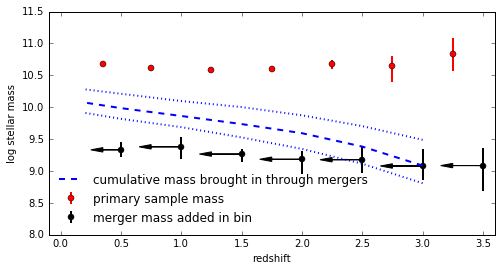

In [14]:
# Calculate the average value using integrals
def get_av(top, bot, ml, mh, *int_args):
    # Get the integral of some function between 
    return quad(top, ml, mh, args=int_args)[0] / quad(bot, ml, mh, args=int_args)[0]

# Return the average and 1-sigma limits of a distribution
def get_sigma(dist):
    av = np.nanpercentile(dist, 50.)
    l = np.nanpercentile(dist, 15.6)
    u = np.nanpercentile(dist, 84.4)
    return np.log10(l), np.log10(av), np.log10(u)


# Set up record arrays
MergerMass, e_MergerMass = [], []
PriMass, e_PriMass = [], []

for i in range(len(gsmf_z)-1):
    zl, zh = gsmf_z[i], gsmf_z[i+1]
    
    gsmf_args = gsmf_p[i]
    gsmf_errs = gsmf_e[i]
    
    # Generate realisations of the GSMF parameters
    m_stars = (gsmf_errs[0] * np.random.randn(N)) + gsmf_args[0]
    alphas = (gsmf_errs[1] * np.random.randn(N)) + gsmf_args[1]
    phi_stars = (gsmf_errs[2] * np.random.randn(N)) + gsmf_args[2]
    
    # Generate realisations of the fm parameters
    f0s = (ef0 * np.random.randn(N)) + f0
    ms = (em * np.random.randn(N)) + m
    t_obss = (et_obs * np.random.randn(N)) + t_obs
    
    merger_mass = []
    pri_mass = []
    
    for j in range(N):
        # Package GSMF realisation parameters
        gsmf_args_j = [m_stars[j], alphas[j], phi_stars[j]]
    
        # Get the average mass of a primary galaxy
        M_pri = get_av(numerator, denominator, gt_mass, 12., *gsmf_args_j)
        pri_mass.append(M_pri)

        # Get the average mass of a companion
        M_comp = get_av(numerator, denominator, np.log10(M_pri/mu), np.log10(M_pri), *gsmf_args_j)
        
        # Calculate number of mergers per galaxy over this redshift range
        N_merg = quad(int_fn, zl, zh, args=(t_obss[j], f0s[j], ms[j]))[0]

        # Calculate the mass given through mergers
        M_merg = N_merg * M_comp
        
        merger_mass.append(M_merg)
    
    # Calculate the average and 1sigma statistics
    M_l, M_av, M_u = get_sigma(merger_mass)
    P_l, P_av, P_u = get_sigma(pri_mass)
    
    # Save the results
    MergerMass.append(M_av)
    e_MergerMass.append([M_u-M_av, M_av-M_l])
    PriMass.append(P_av)
    e_PriMass.append([P_u-P_av, P_av-P_l])
        
    print zl, zh, M_av, '(+', M_av-M_l, ') (-', M_u-M_av, ')'
        
# Sort out plot
e_MergerMass = np.array(e_MergerMass)
e_PriMass = np.array(e_PriMass)

# Set up figure
fig, ax = plt.subplots(1, 1, figsize=(8,4))

# Plot the primary sample evolution
ax.errorbar(gsmf_z[:-1]+np.diff(gsmf_z)/2., PriMass, yerr=[e_PriMass[:,0], e_PriMass[:,1]],
           c='r', fmt='o', capsize=0, lw=2., label='primary sample mass')

# Plot the mass from mergers within each redshift bin
ax.errorbar(gsmf_z[1:], MergerMass, yerr=[e_MergerMass[:,0], e_MergerMass[:,1]], 
            c='k',fmt='o', capsize=0, lw=2., label='merger mass added in bin')
for i in range(len(gsmf_z)-1):
    dz = gsmf_z[i+1]-gsmf_z[i]
    ax.arrow(gsmf_z[i+1], MergerMass[i], -0.5*dz, 0, head_width=0.07, head_length=0.1, 
             fc='k', ec='k')
    
# Plot the cumulative stellar mass growth from merging
cumsum_l = np.log10(np.cumsum(np.power(10, (MergerMass - e_MergerMass[:,1])[::-1])))
cumsum_u = np.log10(np.cumsum(np.power(10, (MergerMass + e_MergerMass[:,0])[::-1])))
cumsum_av = np.log10(np.cumsum(np.power(10, MergerMass[::-1])))

ax.plot(gsmf_z[:-1][::-1], cumsum_l, ':b', lw=2)
ax.plot(gsmf_z[:-1][::-1], cumsum_u, ':b', lw=2)
ax.plot(gsmf_z[:-1][::-1], cumsum_av, '--b', lw=2, label='cumulative mass brought in through mergers')


ax.set_xlim(-0.1, 3.6)
ax.set_ylim(8., 11.5,)
ax.set_ylabel('log stellar mass'), ax.set_xlabel('redshift')
ax.legend(loc='best', fontsize=12, numpoints=1).draw_frame(False)

print 'Over entire redshift range mass from these mergers is: {0:1.2f} (+{1:1.2f} -{2:1.2f}) log(M*/M_sol)'.format(
            cumsum_av[-1], cumsum_u[-1]-cumsum_av[-1], cumsum_av[-1]-cumsum_l[-1])

The red points show the average stellar mass of a primary sample galaxy. The black points show the average stellar mass brought in through mergers down to a 1:$\mu$ stellar mass ratio in that redshift (time) bin. The blue dashed line is the cumulative stellar mass brought in through mergers, with the 1$\sigma$ uncertainty denoted by the blue dotted lines.